In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.stats.anova import _get_covariance,anova_lm 
%matplotlib inline


## PROBLEM 1 -> SALARY DATASET PROBLEM

In [6]:
SALARY_DF = pd.read_csv(r'C:\Users\Tnluser\Downloads\SalaryData.csv')
SALARY_DF.head(5)

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [ ]:
# Basic EDA and missing value checks

In [7]:
SALARY_DF.dtypes

Education     object
Occupation    object
Salary         int64
dtype: object

In [8]:
SALARY_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [6]:
# unique values of Education and Occupation. 
SALARY_DF['Education'].unique()

array([' Doctorate', ' Bachelors', ' HS-grad'], dtype=object)

In [7]:
SALARY_DFdf['Occupation'].unique()

array([' Adm-clerical', ' Sales', ' Prof-specialty', ' Exec-managerial'],
      dtype=object)

In [9]:
# Converting object type variables to categorical variables
SALARY_DF.Education  = pd.Categorical(SALARY_DF.Education )


In [11]:
SALARY_DF.Occupation  = pd.Categorical(SALARY_DF.Occupation )


In [12]:
SALARY_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Education   40 non-null     category
 1   Occupation  40 non-null     category
 2   Salary      40 non-null     int64   
dtypes: category(2), int64(1)
memory usage: 824.0 bytes


### Problem 1 Part (A)

Q1A) State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

In [ ]:
#1 way ANOVA Hypothesis for education

H(0): X1 = X2 = X3
    
H(1): mean salary for at least 1 education level is different


In [ ]:
#1 way ANOVA Hypothesis for occupation

H(0): X1 = X2 = X3 = X4
    
H(1): mean salary for at least 1 occupation level is different

Q2A) Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [14]:
mod = ols('Salary ~ C(Education) ', data=SALARY_DF).fit()
anova_table = sm.stats.anova_lm(mod, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,30.95628,1.257709e-08
Residual,37.0,6.137256e+10,1.658718e+09,NaN,NaN


In [ ]:
F statistic value = 30.96.
at alpha = 0.05, 
v1 = 2
v2 = 37
Critical Val = 3.252  

In [ ]:
# Inference is included in the business report

Q3A) Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [16]:
mod2 = ols('Salary ~ C(Occupation)', data=SALARY_DF).fit()
anova_table2 = sm.stats.anova_lm(mod2, typ=1)
anova_table2

,df,sum_sq,mean_sq,F,PR(>F)
C(Occupation),3.0,1.125878e+10,3.752928e+09,0.884144,0.458508
Residual,36.0,1.528092e+11,4.244701e+09,NaN,NaN


In [ ]:
The test statistic is the F value =  0.88
at alpha = 0.05, 
v1 = 3
v2 = 36
Critical Val = 2.866

In [ ]:
# Inference is included in the business report

Q4A) If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

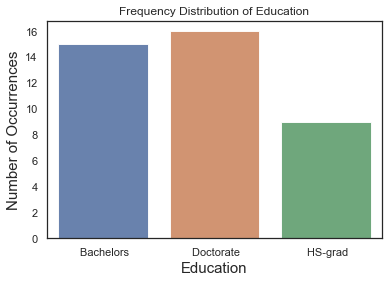

In [21]:
Education_bar = SALARY_DF['Education'].value_counts()
sns.set(style="white")
sns.color_palette("Paired")
sns.barplot(Education_bar.index, Education_bar.values, alpha=0.9)
plt.title('Frequency Distribution of Education')
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('Education', fontsize=15)
plt.show()

In [22]:
sal_grp_edu = SALARY_DF.groupby('Education')[['Salary']].count()
sal_grp_edu.head()

,Salary
Education,
Bachelors,15
Doctorate,16
HS-grad,9


<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

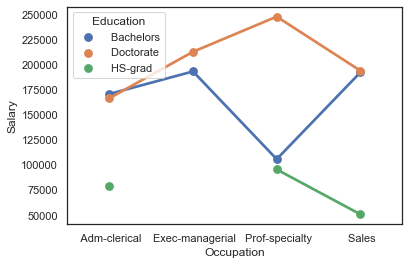

In [24]:
sns.pointplot(x='Occupation', y='Salary', data=SALARY_DF, hue='Education', ci= None)

### Problem 1 Part (B)

Q1B) What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

In [21]:
model = ols('Salary ~  C(Education):C(Occupation)', data=SALARY_DF ).fit()

In [22]:
sm.stats.anova_lm(model , typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education):C(Occupation),11.0,1.438019e+11,1.307290e+10,18.384842,3.340466e-10
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN


<AxesSubplot:xlabel='Education', ylabel='Salary'>

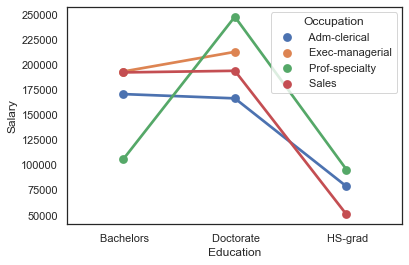

In [25]:
sns.pointplot(x='Education', y='Salary', data=SALARY_DF, hue='Occupation',ci = None)

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

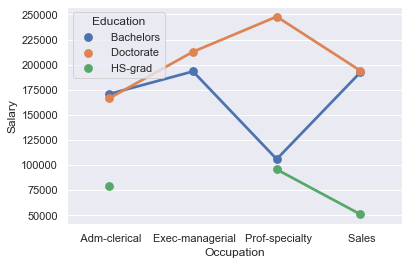

In [24]:
sns.pointplot(x='Occupation', y='Salary', data=SALARY_DF, hue='Education', ci= None)

Q2B) Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

In [25]:
model_2B = ols('Salary ~  C(Education)+C(Occupation) + C(Education):C(Occupation)', data=SALARY_DF).fit()
sm.stats.anova_lm(model_2B , typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,72.211958,5.466264e-12
C(Occupation),3.0,5.519946e+09,1.839982e+09,2.587626,7.211580e-02
C(Education):C(Occupation),6.0,3.634909e+10,6.058182e+09,8.519815,2.232500e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN


#### Hypothesis with respect to Education 

H(0) - The mean salary for various graduation levels are equal.

H(1) - The mean salary for at least one graduation level is different from the other means. 

#### Hypothesis with respect to Occupation 

H(0) - The mean salary for various occupation levels are equal.

H(1) - The mean salary for at least one Oocupation level is different from the other means

#### Hypothesis with respect to the interaction of Education and Occupation 

H(0) - There is NO interaction effect between Education and Occupation when it comes to Salary

H(1) - There is an interaction effect between Education and Occupation when it comes to Salary

Q3B) Explain the business implications of performing ANOVA for this particular case study.

## PROBLEM  2 -> Education - Post 12th Standard dataset 


In [27]:
Coll_DF = pd.read_csv(r'C:\Users\Tnluser\Downloads\Education+-+Post+12th+Standard.csv')
#df2.head(10)

### Q1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

In [28]:
# Get the number of rows and columns
rows = len(Coll_DF.axes[0])
cols = len(Coll_DF.axes[1])
  
# Print the number of rows and columns
print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))

Number of Rows: 777
Number of Columns: 18


In [29]:
Coll_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [41]:
Coll_DF.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


Text(0, 0.5, 'Acceptances')

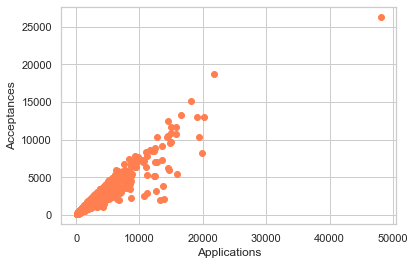

In [95]:
# Scatterplots compare numeric to numeric data

#This scatter compares,applications to acceptances

plt.scatter(Coll_DF['Apps'],Coll_DF['Accept'], c='coral')
plt.xlabel("Applications")
plt.ylabel("Acceptances")

Text(0, 0.5, '% of new students from top 10% of Higher Sec class')

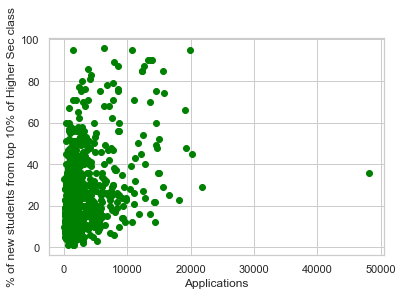

In [92]:
plt.scatter(Coll_DF['Apps'],Coll_DF['Top10perc'],c='green')
plt.xlabel("Applications")
plt.ylabel("% of new students from top 10% of Higher Sec class")

Text(0, 0.5, 'Instructional expenditure per student')

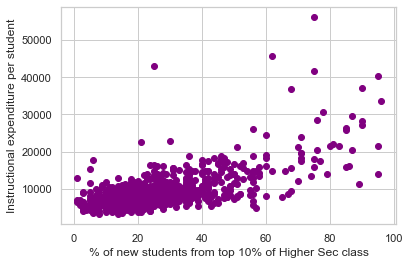

In [93]:
plt.scatter(Coll_DF['Top10perc'],Coll_DF['Expend'],c = 'purple')
plt.xlabel("% of new students from top 10% of Higher Sec class")
plt.ylabel("Instructional expenditure per student")

In [42]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

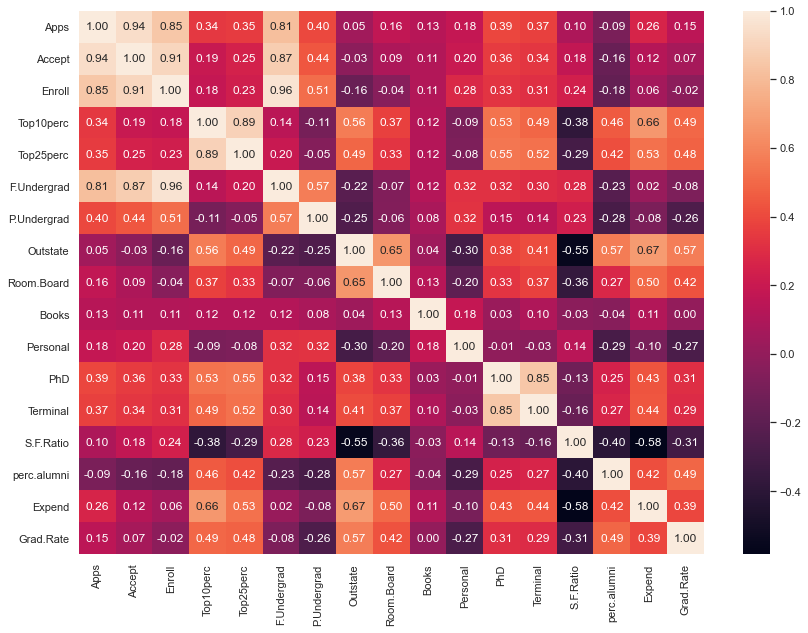

In [43]:
plt.figure(figsize=(14,10))
sns.heatmap(Coll_DF.corr(),annot=True,fmt=".2f");


Let us look at the top 5 colleges. So we look at the gross number of applications sent, the number of new students enrolled, number of applications being accepted. 


In [96]:
Top5_df = Coll_DF[["Names", "Apps","Accept","Enroll"]]
Top5_df_apps = Top7_df.sort_values(["Apps"], ascending=False)
Top5_df_apps.head()


,Names,Apps,Accept,Enroll
483,Rutgers at New Brunswick,48094,26330,4520
461,Purdue University at West Lafayette,21804,18744,5874
59,Boston University,20192,13007,3810
605,University of California at Berkeley,19873,8252,3215
445,Pennsylvania State Univ. Main Campus,19315,10344,3450


In [99]:
Top5_df_apps.tail()

,Names,Apps,Accept,Enroll
768,Wisconsin Lutheran College,152,128,75
500,Saint Mary-of-the-Woods College,150,130,88
135,College of St. Joseph,141,118,55
85,Capitol College,100,90,35
110,Christendom College,81,72,51


In [98]:
#top5 colleges with most to least number of application acceptances

Top5_df_accept = Top5_df.sort_values(["Accept"], ascending=False)
Top5_df_accept.head()

,Names,Apps,Accept,Enroll
483,Rutgers at New Brunswick,48094,26330,4520
461,Purdue University at West Lafayette,21804,18744,5874
366,Michigan State University,18114,15096,6180
274,Indiana University at Bloomington,16587,13243,5873
59,Boston University,20192,13007,3810


In [100]:
#top5 colleges with most to least number of new students enrolling. 

Top5_df_enroll = Top5_df.sort_values(["Enroll"], ascending=False)
Top5_df_enroll.head()

,Names,Apps,Accept,Enroll
581,Texas A&M Univ. at College Station,14474,10519,6392
366,Michigan State University,18114,15096,6180
461,Purdue University at West Lafayette,21804,18744,5874
274,Indiana University at Bloomington,16587,13243,5873
623,University of Illinois - Urbana,14939,11652,5705


### Q2) Is scaling necessary for PCA in this case? Give justification and perform scaling.

Yes scaling is necessary. With scaling,considering the correlation matrix rather than the covariance, you remove this bias towards high variances.
As tested earlier, the dataset already has plenty of outliers.

In [48]:
from scipy.stats import zscore

Coll_DFdrop = Coll_DF.drop(['Names'], axis =1)
Coll_DFscaled = Coll_DFdrop.apply(zscore)
Coll_DFscaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


In [49]:
Coll_DFstd = StandardScaler().fit_transform(Coll_DFdrop)
Coll_DFstd

array([[-3.46881819e-01, -3.21205453e-01, -6.35089011e-02, ...,
        -8.67574189e-01, -5.01910084e-01, -3.18251941e-01],
       [-2.10884040e-01, -3.87029908e-02, -2.88584214e-01, ...,
        -5.44572203e-01,  1.66109850e-01, -5.51261842e-01],
       [-4.06865631e-01, -3.76317928e-01, -4.78121319e-01, ...,
         5.85934748e-01, -1.77289956e-01, -6.67766793e-01],
       ...,
       [-2.33895071e-01, -4.23771558e-02, -9.15087008e-02, ...,
        -2.21570217e-01, -2.56241250e-01, -9.59029170e-01],
       [ 1.99171118e+00,  1.77256262e-01,  5.78332661e-01, ...,
         2.12019418e+00,  5.88797079e+00,  1.95359460e+00],
       [-3.26765760e-03, -6.68715889e-02, -9.58163623e-02, ...,
         4.24433755e-01, -9.87115613e-01,  1.95359460e+00]])

### Q3) Comment on the comparison between the covariance and the correlation matrices from this data [on scaled data].

In [50]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

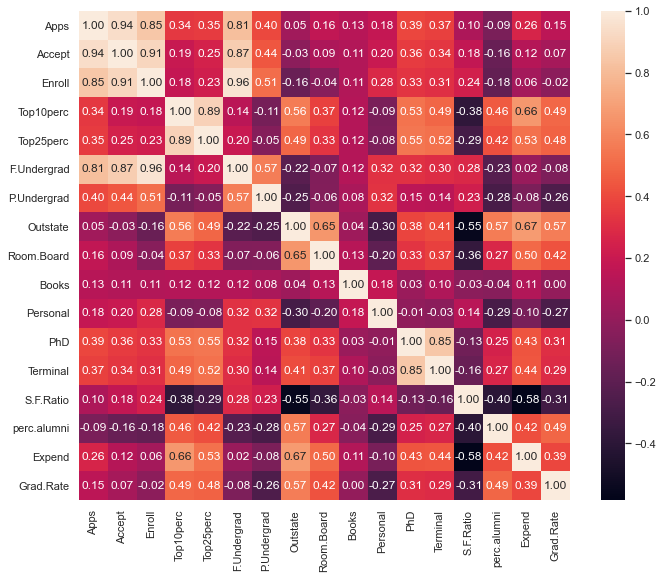

In [51]:
#To represent the correlation matrix, I will be using the heatmap

plt.figure(figsize=(11,9))
sns.heatmap(Coll_DFscaled.corr(),annot=True,fmt=".2f");

In [58]:
cov_matrix = np.cov(Coll_DFscaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

### Q4) Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless specifically asked to do so]

In [59]:
# Outliers BEFORE scaling

<AxesSubplot:>

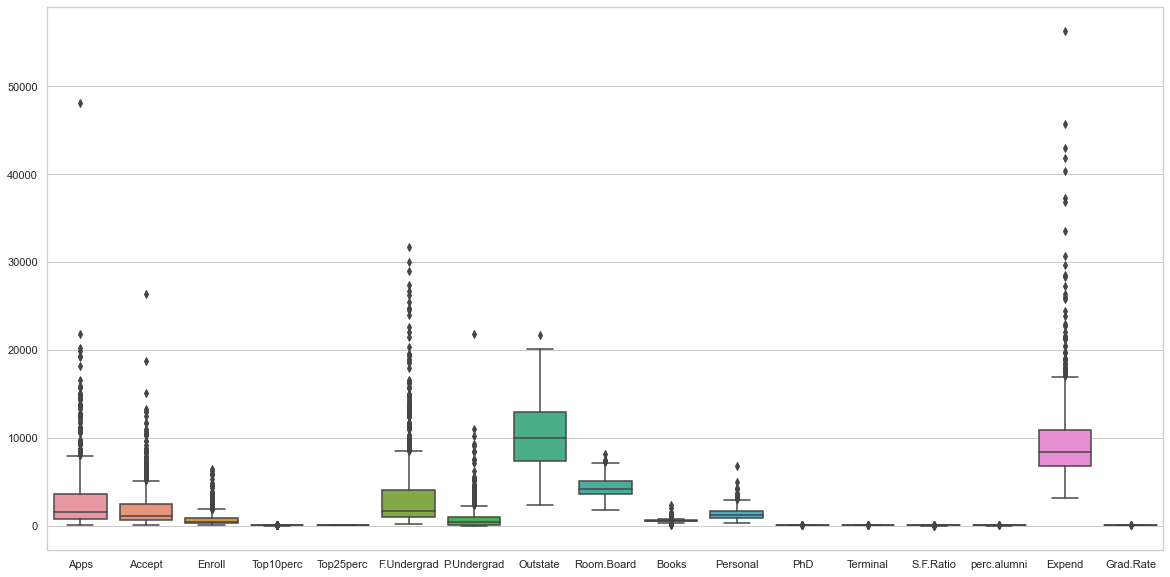

In [60]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot( data = Coll_DF) #Clearly outliers are present

In [61]:
# Outliers AFTER scaling 

<AxesSubplot:>

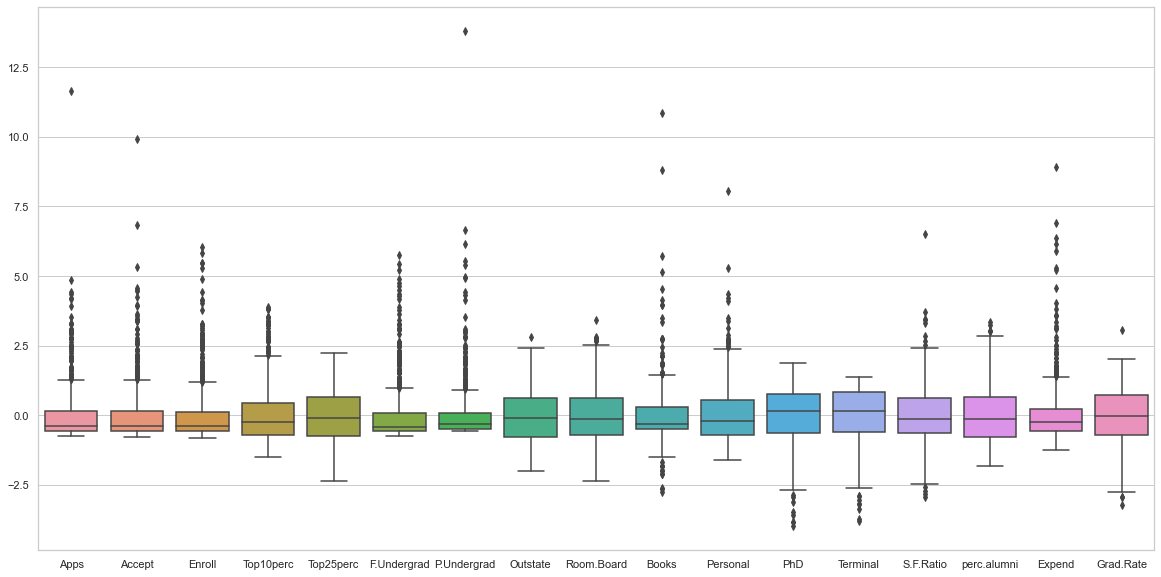

In [62]:
sns.set_style("whitegrid")
fig, ax2 = plt.subplots(figsize=(20, 10))
sns.boxplot( data = Coll_DFscaled)

### Q5) Extract the eigenvalues and eigenvectors.[print both]

In [63]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.48765602e-01  3.31598227e-01  6.30921033e-02 -2.81310530e-01
   5.74140964e-03  1.62374420e-02  4.24863486e-02  1.03090398e-01
   9.02270802e-02 -5.25098025e-02  3.58970400e-01 -4.59139498e-01
   4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01  1.01249056e-01 -2.67817346e-01
   5.57860920e-02 -7.53468452e-03  1.29497196e-02  5.62709623e-02
   1.77864814e-01 -4.11400844e-02 -5.43427250e-01  5.18568789e-01
  -5.84055850e-02  1.45497511e-01  3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01  8.29855709e-02 -1.61826771e-01
  -5.56936353e-02  4.25579803e-02  2.76928937e-02 -5.86623552e-02
   1.28560713e-01 -3.44879147e-02  6.09651110e-01  4.04318439e-01
  -6.93988831e-02 -2.95896092e-02 -8.56967180e-02  4.44638207e-01
   1.11431545e-02]
 [-3.54273947e-01 -8.24118211e-02 -3.50555339e-02  5.15472524e-02
  -3.95434345e-01  5.26927980e-02  1.61332069e-01  1.22678028e-01
 

### Q6) Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [64]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]


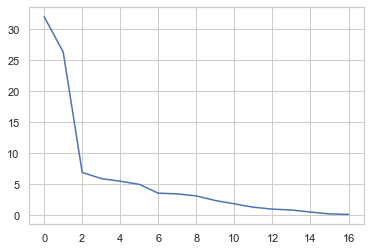

In [65]:
plt.plot(var_exp)

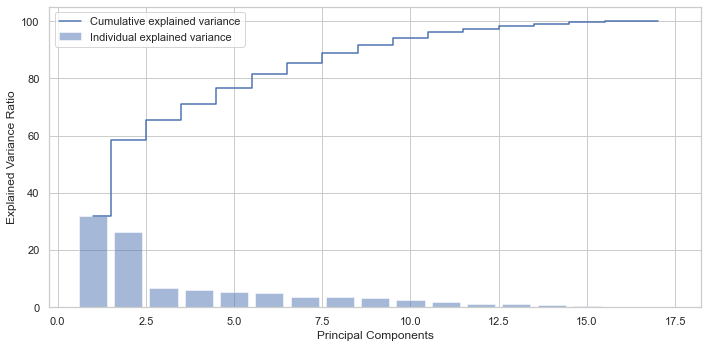

In [66]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [67]:
# the n_components here are the number of dimensions I want my data to be reduced to.
# So from 18 dims, I want just 5 as from the abpve bar plot,Majority of my variation is explained by the first 5 components.

pca = PCA(n_components=5)
data_reduced = pca.fit_transform(Coll_DFscaled)
data_reduced.transpose()

array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560596e-01,  7.91932735e+00, -4.69508066e-01],
       [ 7.67333510e-01, -5.78829983e-01, -1.09281889e+00, ...,
        -7.72352401e-02, -2.06832886e+00,  3.66660943e-01],
       [-1.01073537e-01,  2.27879809e+00, -4.38092811e-01, ...,
        -4.05682478e-04,  2.07356376e+00, -1.32891516e+00],
       [-9.21749373e-01,  3.58891830e+00,  6.77240529e-01, ...,
         5.43164271e-02,  8.52053752e-01, -1.08022495e-01],
       [-7.43975273e-01,  1.05999678e+00, -3.69613269e-01, ...,
        -5.16020640e-01, -9.47755474e-01, -1.13217572e+00]])

In [68]:
data_reduced.shape

(777, 5)

In [69]:
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.0630921 , -0.10124906, -0.08298557,  0.03505553, -0.02414794,
        -0.06139298,  0.13968172,  0.04659887,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131052,  0.26781736,  0.16182677, -0.05154725, -0.10976654,
         0.10041233, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.0792735 

In [70]:
#Exporting the principal components to a dataframe 
df_comp = pd.DataFrame(pca.components_,columns=list(Coll_DFscaled))
df_comp.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.248766,0.207602,0.176304,0.354274,0.344001,0.154641,0.026443,0.294736,0.249030,0.064758,-0.042529,0.318313,0.317056,-0.176958,0.205082,0.318909,0.252316
1,0.331598,0.372117,0.403724,-0.082412,-0.044779,0.417674,0.315088,-0.249644,-0.137809,0.056342,0.219929,0.058311,0.046429,0.246665,-0.246595,-0.131690,-0.169241
2,-0.063092,-0.101249,-0.082986,0.035056,-0.024148,-0.061393,0.139682,0.046599,0.148967,0.677412,0.499721,-0.127028,-0.066038,-0.289848,-0.146989,0.226744,-0.208065
3,0.281311,0.267817,0.161827,-0.051547,-0.109767,0.100412,-0.158558,0.131291,0.184996,0.087089,-0.230711,-0.534725,-0.519443,-0.161189,0.017314,0.079273,0.269129
4,0.005741,0.055786,-0.055694,-0.395434,-0.426534,-0.043454,0.302385,0.222532,0.560919,-0.127289,-0.222311,0.140166,0.204720,-0.079388,-0.216297,0.075958,-0.109268


### Q7) Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

A nonzero vector x is an eigenvector if there is a number λ such that

Ax = λx.

The scalar value λ is called the eigenvalue.

In [82]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('\n Eigenvalues in descending order: \n') 
for i in eig_pairs:
    print(i[0])


 Eigenvalues in descending order: 

5.450521622150292
4.483606861940846
1.174667612947485
1.0082057299695013
0.9342312255505801
0.8484911715045003
0.6057878032794013
0.5878722195930831
0.5306126247005817
0.4043028977516904
0.3134458798102978
0.22061096461638846
0.1677941521658084
0.14397849747566238
0.08802463699454388
0.03672544741045212
0.023027868633731064


In [72]:
eig_vals = eig_vals.real
print(eig_vals)

[5.45052162 4.48360686 1.17466761 1.00820573 0.93423123 0.84849117
 0.6057878  0.58787222 0.53061262 0.4043029  0.02302787 0.03672545
 0.31344588 0.08802464 0.1439785  0.16779415 0.22061096]


Notice that the position of an eigenvalue in the array eigvals correspond to the column in eigvecs with its eigenvector:

In [73]:
lambda1 = eig_vals[0]
print(lambda1)

5.450521622150292


In [74]:
x1 = eig_vecs[:,0].reshape(17,)
x1 = np.around(x1, decimals = 2)
print(x1)

[-0.25 -0.21 -0.18 -0.35 -0.34 -0.15 -0.03 -0.29 -0.25 -0.06  0.04 -0.32
 -0.32  0.18 -0.21 -0.32 -0.25]


In [75]:
lam_vec1 = lambda1 * x1
lam_vec1 = np.around(lam_vec1 , decimals =2)
lam_vec1

array([-1.36, -1.14, -0.98, -1.91, -1.85, -0.82, -0.16, -1.58, -1.36,
       -0.33,  0.22, -1.74, -1.74,  0.98, -1.14, -1.74, -1.36])

A(-2.48765602e-01 ) = (5.45052162)(-2.48765602e-01)

### Q8) Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [76]:
print("Cumulative Variance Explained by the Eigen values : \n\n" ,cum_var_exp)

Cumulative Variance Explained by the Eigen values : 

 [ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]


Eigen vectors are nothing but our principal components. The eigen vectors indicate a linear combination of the variables which captures most of the variation.

With each component the % of variation explained compounds. If PC1 explains 32% of total variation, then PC2 explains an additional 26%, all-in-all explaining 58% of the total variation. Nearly 90% of the total variation is explained by the 8th PC.

Under Eigen-Vectors we can say that Principal components show both common and unique variance of the variable. Basically, it is variance focused approach seeking to reproduce total variance and correlation with all components. The principal components are basically the linear combinations of the original variables weighted by their contribution to explain the variance in a particular orthogonal dimension.

### Q9) Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

While dealing with large datasets in general, to arrive at a conclusion one need not consider redundant dimentions. 
Business-wise, it would prove to be cheaper in collecting data features you actually need vs working with the entire dump. 
Reduced dimensionality let's your model focus on what's really required and thus improves model performance. 

PCs needed for further analysis - 
The first 3 Principal components explain most of the data's variability. The remaining are just small incremnts to the total. 